# Set up connection to Data Base

## (1) Enter user name and password to connect to data base

In [2]:
from database.db_setup import *

Please enter DataJoint username:  root
Please enter DataJoint password:  ···············


Connecting root@localhost:3306


## (2) Looking at individual tables

In [3]:
UnitLevelDataCleaning()

*patient_id    *unit_id    *session_nr    *annotator_id  *name        data       description   
+------------+ +---------+ +------------+ +------------+ +----------+ +--------+ +------------+
1              0           1              p1             spkclean     =BLOB=                   
1              1           1              p1             spkclean     =BLOB=                   
1              2           1              p1             spkclean     =BLOB=                   
1              3           1              p1             spkclean     =BLOB=                   
1              4           1              p1             spkclean     =BLOB=                   
1              5           1              p1             spkclean     =BLOB=                   
1              6           1              p1             spkclean     =BLOB=                   
1              7           1              p1             spkclean     =BLOB=                   
1              8           1              p1             spkclean     =BLOB=                   
1              9           1              p1             spkclean     =BLOB=                   
1              10          1              p1             spkclean     =BLOB=                   
1              11          1              p1             spkclean     =BLOB=                   
   ...
 (Total: 268)

Get table 'patients':

In [5]:
Patient()

*patient_id    age     gender     year     removed_tissue epilepsy_type  additional_inf
+------------+ +-----+ +--------+ +------+ +------------+ +------------+ +------------+
1              1       x          2017     unknown        unknown                      
2              100     x          2017     unknown        unknown                      
3              50      x          2017     unknown        unknown                      
 (Total: 3)

In [6]:
Annotator()

*annotator_id  first_name     last_name      additional_inf
+------------+ +------------+ +------------+ +------------+
p1             max            mustermann                   
p2             susi           lastname                     
 (Total: 2)

Get table 'movie_sessions':

In [8]:
SpikeTimesDuringMovie()

*patient_id    *unit_id    *session_nr    spike_time
+------------+ +---------+ +------------+ +--------+
1              0           1              =BLOB=    
1              1           1              =BLOB=    
1              2           1              =BLOB=    
1              3           1              =BLOB=    
1              4           1              =BLOB=    
1              5           1              =BLOB=    
1              6           1              =BLOB=    
1              7           1              =BLOB=    
1              8           1              =BLOB=    
1              9           1              =BLOB=    
1              10          1              =BLOB=    
1              11          1              =BLOB=    
   ...
 (Total: 268)

## (3) Write queries using DataJoint to extract specific data from the data base

If you want to get the firing rates of patient 60, binned in seconds but only of the brain region 'LA', you can get it with the following query:

In [5]:
# Load in spike time files to local directory
list_of_spikes_LA_names = ((ElectrodeUnit & "brain_region = 'LA'" & "patient_id= '60'") * (SpikeTimesDuringMovie)).fetch('spike_times')

In [6]:
# Load spike time files into kernel
list_of_spikes_LA = np.load(list_of_spikes_LA_names[0])

# Remove spike time files from local directory
for name in list_of_spikes_LA_names:
    os.remove(name) 

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [7]:
list_of_spikes_LA

array([4.49860759e+08, 4.49862109e+08, 4.49862790e+08, ...,
       4.54656427e+08, 4.54661128e+08, 4.54661267e+08])

Getting a label from the data base:

In [8]:
label_tom_start_times = (MovieAnnotation & "label_name='tom'").fetch("start_times")[0]

In [9]:
label_tom_stop_times = (MovieAnnotation & "label_name='tom'").fetch("stop_times")[0]

In [10]:
label_tom_values = (MovieAnnotation & "label_name='tom'").fetch("values")[0]

Some commonly used queries are implemented as python functions in 'db_setup.py'

In [11]:
get_unit_id(csc_nr = 1, unit_type='M', unit_nr=2, patient_id=60)

1

## (4) Visualising data base structure

green rectangles: manual tables
    
    
blue ellipses: imported tables
    

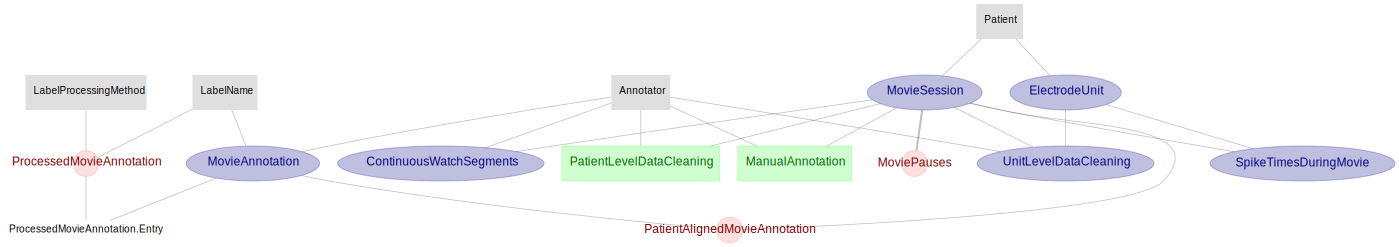

In [13]:
erd = dj.ERD(epi_schema)

erd

In [17]:
MovieAnnotation()

*annotator_id  *label_name    *annotation_da values     start_time stop_times category      indicator_ additional_inf
+------------+ +------------+ +------------+ +--------+ +--------+ +--------+ +-----------+ +--------+ +------------+
p1             paul           2020-04-20     =BLOB=     =BLOB=     =BLOB=     character     =BLOB=                   
p1             rachel         2020-04-20     =BLOB=     =BLOB=     =BLOB=     character     =BLOB=                   
p1             tom            2020-04-20     =BLOB=     =BLOB=     =BLOB=     character     =BLOB=                   
p2             mckenzie       2020-04-20     =BLOB=     =BLOB=     =BLOB=     character     =BLOB=                   
p2             summer         2020-04-20     =BLOB=     =BLOB=     =BLOB=     character     =BLOB=                   
 (Total: 5)

In [7]:
PatientAlignedMovieAnnotation()

*annotator_id  *label_name    *annotation_da *session_nr    *patient_id    label_in_p values     start_time stop_times additionl_info
+------------+ +------------+ +------------+ +------------+ +------------+ +--------+ +--------+ +--------+ +--------+ +------------+
p1             paul           2020-04-20     1              60             =BLOB=     =BLOB=     =BLOB=     =BLOB=                   
p1             rachel         2020-04-20     1              60             =BLOB=     =BLOB=     =BLOB=     =BLOB=                   
p1             tom            2020-04-20     1              60             =BLOB=     =BLOB=     =BLOB=     =BLOB=                   
p2             mckenzie       2020-04-20     1              60             =BLOB=     =BLOB=     =BLOB=     =BLOB=                   
p2             summer         2020-04-20     1              60             =BLOB=     =BLOB=     =BLOB=     =BLOB=                   
 (Total: 5)